### 02 Segmenting characters from the plate area

In [1]:
# Import modules
import cv2
from matplotlib import pyplot as plt

# Load and Display pictures
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
# plt--gray scale pictures
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

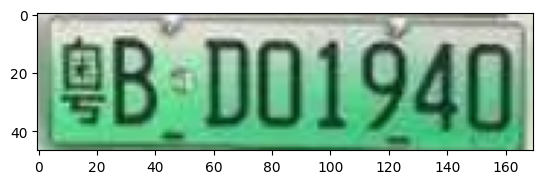

In [2]:
# Load
rawImage = cv2.imread("./car_license/test2.png")
plt_show0(rawImage)

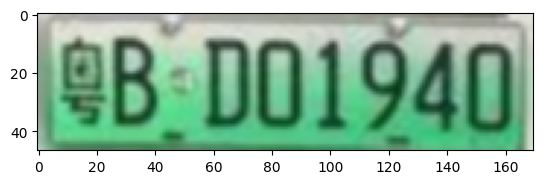

In [3]:
# Gaussian
image = cv2.GaussianBlur(rawImage, (3, 3), 0)
# preview
plt_show0(image)

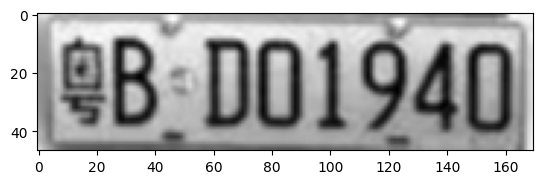

In [4]:
# RGB--Gray
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

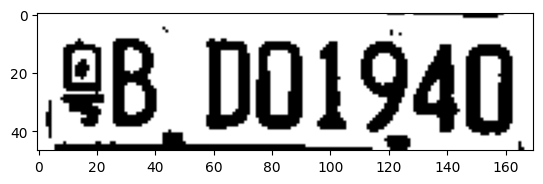

In [5]:
# Threshold
ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

(47, 170)


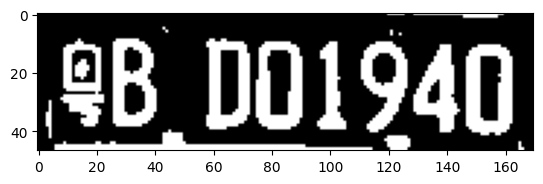

In [6]:
# Count the white spots in the binarized pictures
area_white = 0
area_black = 0
height, width = image.shape
print(image.shape)
for i in range(height):
    for j in range(width):
        if image[i, j] == 255:
            area_white += 1
        else:
            area_black += 1
if area_white>area_black:
    ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    plt_show(image)

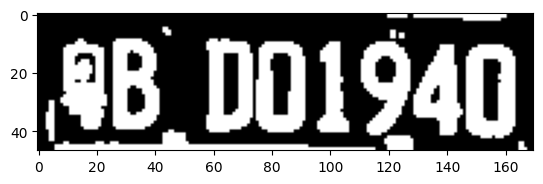

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
# kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
# kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
# image = cv2.erode(image, kernelX)
# image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernel)
plt_show(image)
# kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# print(kernelX)
# image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 2)
# plt_show(image)

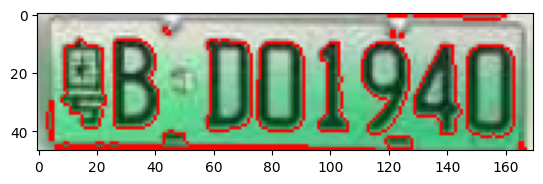

In [8]:
# contour detection
# cv2.RETR_EXTERNAL
# cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# plot contours
image1 = rawImage.copy()
cv2.drawContours(image1, contours, -1, (0, 0, 255), 1)
plt_show0(image1)

[[3, 30, 3, 14], [6, 40, 110, 7], [8, 9, 16, 31], [26, 9, 16, 31], [43, 5, 3, 3], [58, 9, 16, 32], [75, 10, 17, 31], [96, 10, 11, 31], [111, 10, 17, 32], [119, 42, 10, 5], [120, 0, 7, 2], [121, 6, 2, 3], [124, 7, 2, 2], [129, 11, 17, 31], [129, 0, 32, 3], [147, 11, 17, 32], [165, 44, 3, 3]]


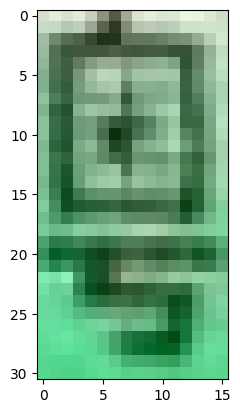

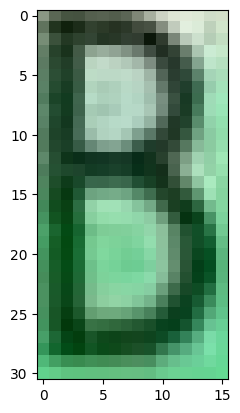

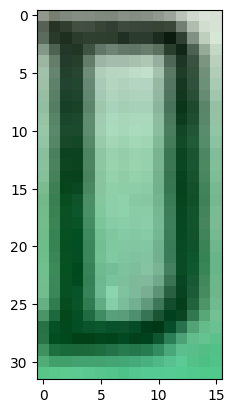

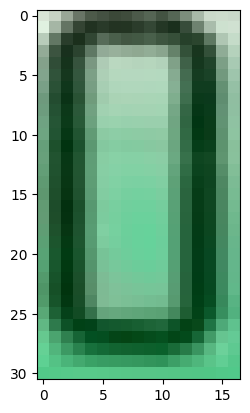

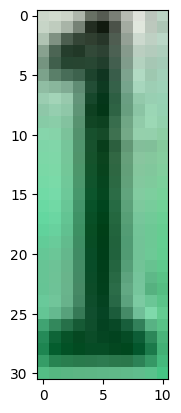

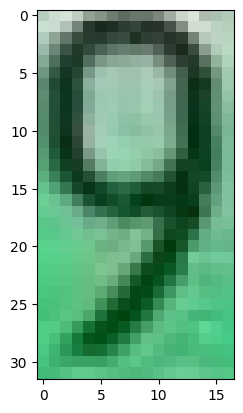

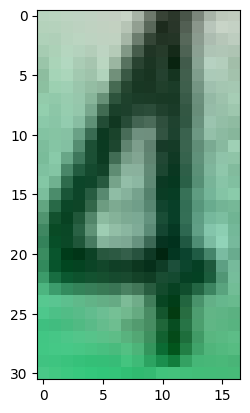

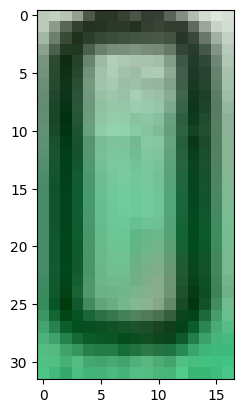

In [9]:
# Segment contours
words = []
for item in contours:
    # cv2.boundingRect--rectagulaize the contours
    word = []
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    word.append(x)
    word.append(y)
    word.append(weight)
    word.append(height)
    words.append(word)
    
words = sorted(words,key=lambda s:s[0],reverse=False)
    
print(words)

i = 0
for word in words:
    if (word[3] > (word[2] * 1.8)) and (word[3] < (word[2] * 3.5)):
        i = i+1
        image = rawImage[word[1]:word[1] + word[3], word[0]:word[0] + word[2]]
        plt_show0(image)
        cv2.imwrite('./words/test2_'+str(i)+'.png', image)
